# Featuring

Import Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn import linear_model

Importing cleaned dataset

In [2]:
train_df = pd.read_csv('./datasets/clean_train.csv')

In [3]:
train_df.shape

(2051, 186)

In [4]:
# test_df = test_df.align(train_df, axis =1, join="right")
# test_df = test_df[0]

In [5]:
train_df.shape

(2051, 186)

In [6]:
train_df.head()

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,SalePrice,Age,Mod_Age
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0.0,0,3,130500,34,5
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0.0,0,4,220000,13,12
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0.0,0,1,109000,57,3
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0.0,0,4,174000,4,3
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0.0,0,3,138500,110,17


In [7]:
X_train=train_df.drop(['SalePrice'],axis=1)
y_train=train_df['SalePrice']

In [8]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

In [9]:
X_train_scaled.shape

(2051, 185)

## 5.3 The Linear & The Lasso

### 5.3.1 Linear Regression

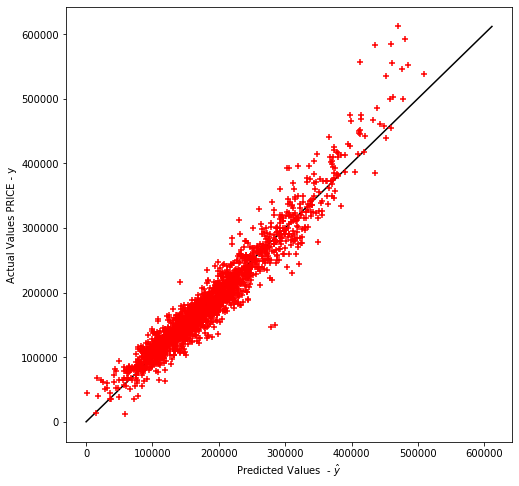

In [10]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train_scaled, y_train)

predictions  =  model.predict(X_train_scaled)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values  - $\hat{y}$")
plt.ylabel("Actual Values PRICE - y")

plt.plot([0, np.max(y_train)], [0, np.max(y_train)], c = 'k')

plt.show()

In [11]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Generate Coeficients for Linear Regression

In [12]:
lr.coef_

array([ 1.22562807e+03,  7.51388098e+03,  1.29981722e+03,  2.79665934e+03,
        1.11674849e+04,  7.35182051e+03, -2.90455667e+03, -1.24246578e+03,
       -1.01947919e+03, -2.29389727e+03, -4.68001133e+02,  7.21514534e+04,
        1.49784688e+04,  5.38199991e+04,  2.88251246e+04,  3.37108858e+04,
       -6.00999403e+02, -1.33221442e+03,  1.03673360e+03,  3.76840546e+02,
        5.10823323e+02, -5.50896256e+03, -5.33138175e+02, -4.07699750e+03,
       -3.91116658e+03, -8.75135610e+02, -1.44692450e+03, -1.03865585e+04,
       -5.90781544e+03, -1.45739657e+03,  1.63433498e+03,  1.75429055e+03,
        1.49562652e+02, -6.67813611e+02,  2.32813066e+02,  3.15588342e+03,
        4.40992536e+02,  4.54516385e+03,  2.91382016e+03,  2.48959866e+02,
        1.07042312e+03,  9.36944887e+03,  4.41239958e+03,  1.53691662e+03,
       -1.73481798e+03, -3.06234484e+03, -9.05675266e+01,  8.77540208e+02,
        4.08190634e+01, -2.69066754e+02, -8.66906130e+02,  1.98317781e+03,
       -7.91746988e+02,  

### Scaling

In [13]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
# X_test_scaled = ss.transform(X_test)
# X.shape

### Predict

In [14]:
# y_hat = lr.predict(X_test_scaled)

### Generate $R^2$ for Linear Regression

In [15]:
scores_train = cross_val_score(lr,X_train_scaled,y_train, n_jobs = -1)
scores_train.mean()

C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


-5.767875524840656e+23

In [16]:
# scores_test = cross_val_score(lr,X_test_scaled,y_test, n_jobs = -1)
# scores_test.mean()

### 5.3.2 Elastic Net

In [17]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
optimal_enet.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=array([0.01   , 0.05125, 0.0925 , 0.13375, 0.175  , 0.21625, 0.2575 ,
       0.29875, 0.34   , 0.38125, 0.4225 , 0.46375, 0.505  , 0.54625,
       0.5875 , 0.62875, 0.67   , 0.71125, 0.7525 , 0.79375, 0.835  ,
       0.87625, 0.9175 , 0.95875, 1.     ]),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=1)

In [18]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
print(enet)

ElasticNet(alpha=338.3886792865922, copy_X=True, fit_intercept=True,
           l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)


In [19]:
enet.fit(X_train_scaled, y_train)

ElasticNet(alpha=338.3886792865922, copy_X=True, fit_intercept=True,
           l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

### Generate Coeficients for Elastic Net

In [28]:
enet_coef = enet.coef_

In [21]:
predictions_E = enet.predict(X_train_scaled)

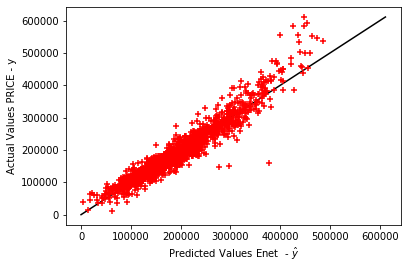

In [23]:
plt.scatter(predictions_E, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values Enet  - $\hat{y}$")
plt.ylabel("Actual Values PRICE - y")

plt.plot([0, np.max(y_train)], [0, np.max(y_train)], c = 'k')

plt.show()

### Generate  𝑅2  for Elastic Net

In [26]:
enet_scores_train = cross_val_score(enet, X_train_scaled, y_train)
# enet_scores_test = cross_val_score(enet, X_test_scaled, y_test, cv=k)
print('enet_scores_train:')
print(enet_scores_train.mean())
# print('enet_scores_test:')
# print(enet_scores_test.mean())

enet_scores_train:
0.8587008857069037


C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Removing 0 Coefficient features from elastic net coef_

In [43]:
Feat_train_df = X_train.T
Feat_train_df['feature'] = Feat_train_df.index
Feat_train_df = Feat_train_df.reset_index()
Feat_train_df['coef']= enet_coef
Feat_train_df.head()

,index,0,1,2,3,4,5,6,7,8,...,2043,2044,2045,2046,2047,2048,2049,2050,feature,coef
0,MS Zoning_C (all),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MS Zoning_C (all),-542.341949
1,MS Zoning_FV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MS Zoning_FV,517.385464
2,MS Zoning_I (all),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MS Zoning_I (all),455.862684
3,MS Zoning_RH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MS Zoning_RH,19.585596
4,MS Zoning_RL,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,MS Zoning_RL,0.000000


In [45]:
def keep_cols(DataFrame, keep_these):
    """Keep only the columns [keep_these] in a DataFrame, delete
    all other columns. 
    """
    drop_these = list(set(list(DataFrame)) - set(keep_these))
    return DataFrame.drop(drop_these, axis = 1)

Feat_train_df = Feat_train_df.pipe(keep_cols, ['feature', 'coef'])
Feat_train_df.head()

,feature,coef
0,MS Zoning_C (all),-542.341949
1,MS Zoning_FV,517.385464
2,MS Zoning_I (all),455.862684
3,MS Zoning_RH,19.585596
4,MS Zoning_RL,0.000000


In [53]:
X_feat = Feat_train_df
X_feat = X_feat[X_feat.coef == 0]
X_feat.head()

,feature,coef
4,MS Zoning_RL,0.0
6,Roof Style_Gable,-0.0
10,Roof Style_Shed,-0.0
16,Exterior 1st_AsphShn,0.0
19,Exterior 1st_CBlock,0.0


In [56]:
droplist = (X_feat['feature'])

pandas.core.series.Series

In [58]:
Feat_train=train_df.drop(droplist,axis=1)

In [59]:
Feat_train.head()

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RM,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Matl_CompShg,Roof Matl_Membran,...,Garage Yr Blt,Garage Finish,Garage Area,Wood Deck SF,Open Porch SF,Screen Porch,Pool Area,SalePrice,Age,Mod_Age
0,0,0,0,0,0,0,0,0,1,0,...,1976.0,2.0,475.0,0,44,0,0,130500,34,5
1,0,0,0,0,0,0,0,0,1,0,...,1997.0,2.0,559.0,0,74,0,0,220000,13,12
2,0,0,0,0,0,0,0,0,1,0,...,1953.0,1.0,246.0,0,52,0,0,109000,57,3
3,0,0,0,0,0,0,0,0,1,0,...,2007.0,3.0,400.0,100,0,0,0,174000,4,3
4,0,0,0,0,0,0,0,0,1,0,...,1957.0,1.0,484.0,0,59,0,0,138500,110,17


Saving...

In [60]:
Feat_train.to_csv("./datasets/Feat_train.csv", index=False, header=True)

repeat for test set

In [61]:
test_df = pd.read_csv('./datasets/clean_test.csv')

In [66]:
# droplist_test = droplist.drop('Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 'Exterior 1st_Stone', 'Exterior 2nd_Stone', 'Neighborhood_Landmrk' ,'Condition 2_Feedr', 'Condition 2_RRAn',inplace=True)

TypeError: drop() got multiple values for argument 'inplace'

In [62]:
Feat_train=test_df.drop(droplist,axis=1)

KeyError: "['Exterior 1st_CBlock' 'Exterior 1st_ImStucc' 'Exterior 1st_Stone'\n 'Exterior 2nd_Stone' 'Neighborhood_Landmrk' 'Condition 2_Feedr'\n 'Condition 2_RRAn' 'Condition 2_RRNn'] not found in axis"